In [564]:
import steamreviews
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib
import matplotlib.pyplot as plt

try:
    nltk.data.find('sentiment/vader_lexicon')
except LookupError:
    nltk.download('vader_lexicon')

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     d:\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [566]:
app_id = 1962663

In [568]:
request_params = dict()
request_params['filter'] = 'recent'
request_params['day_range'] = '63'

In [570]:
review_dict, query_count = steamreviews.download_reviews_for_app_id(app_id,
                                                                    chosen_request_params=request_params)

[appID = 1962663] expected #reviews = 44289


In [572]:
df = pd.DataFrame(review_dict['reviews']).T

In [574]:
df.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,primarily_steam_deck
193380021,193380021,"{'steamid': '76561199767744028', 'num_games_ow...",english,became poopy after bruce willis operator but R...,1745372828,1745372828,True,0,0,0.5,0,False,False,False,False
193379949,193379949,"{'steamid': '76561198995345965', 'num_games_ow...",turkish,ULAN OROSPUNUN EVLADI MADEM OYNAMAMA İZİN VERM...,1745372736,1745372736,False,0,0,0.5,0,False,False,False,False
193378215,193378215,"{'steamid': '76561198433304390', 'num_games_ow...",english,Diz gaime iz definetwy cawwuv doody wohwzone,1745370494,1745370494,True,0,0,0.5,0,True,False,False,False
193373294,193373294,"{'steamid': '76561198885593603', 'num_games_ow...",english,kinda shit,1745364373,1745364373,True,0,0,0.5,0,True,False,False,False
193369426,193369426,"{'steamid': '76561198035619390', 'num_games_ow...",english,"This game runs poorly, is slow, clunky, full o...",1745360218,1745360218,False,1,0,0.523809552192687988,0,False,False,False,False


In [576]:
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s')

In [578]:
df = df.loc[df['language'] == 'english']

In [580]:
df.shape

(1117, 15)

In [582]:
df.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,primarily_steam_deck
193380021,193380021,"{'steamid': '76561199767744028', 'num_games_ow...",english,became poopy after bruce willis operator but R...,2025-04-23 01:47:08,1745372828,True,0,0,0.5,0,False,False,False,False
193378215,193378215,"{'steamid': '76561198433304390', 'num_games_ow...",english,Diz gaime iz definetwy cawwuv doody wohwzone,2025-04-23 01:08:14,1745370494,True,0,0,0.5,0,True,False,False,False
193373294,193373294,"{'steamid': '76561198885593603', 'num_games_ow...",english,kinda shit,2025-04-22 23:26:13,1745364373,True,0,0,0.5,0,True,False,False,False
193369426,193369426,"{'steamid': '76561198035619390', 'num_games_ow...",english,"This game runs poorly, is slow, clunky, full o...",2025-04-22 22:16:58,1745360218,False,1,0,0.523809552192687988,0,False,False,False,False
193362617,193362617,"{'steamid': '76561199662867468', 'num_games_ow...",english,This game is so bad there should be reason you...,2025-04-22 20:24:01,1745353441,True,0,0,0.5,0,False,False,False,False


In [584]:
split_one = pd.to_datetime('2025-03-03 00:00:00')
split_two = pd.to_datetime('2025-04-03 00:00:00')
split_three = pd.to_datetime('2025-05-03 00:00:00')

df_pre = df.loc[(df['timestamp_created'] >= split_one) & (df['timestamp_created'] < split_two)]
df_post = df.loc[(df['timestamp_created'] >= split_two) & (df['timestamp_created'] < split_three)]

In [586]:
df_pre.shape

(296, 15)

In [588]:
df_post.shape

(778, 15)

In [590]:
df_pre.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,primarily_steam_deck
191837413,191837413,"{'steamid': '76561199215827822', 'num_games_ow...",english,As someone who loved this game so much during ...,2025-04-02 23:06:14,1743635174,False,8,0,0.546569526195526123,0,False,False,False,False
191832304,191832304,"{'steamid': '76561198108831637', 'num_games_ow...",english,This game is making me [h1] RACIST [/h1],2025-04-02 21:35:22,1743629722,False,11,16,0.54558110237121582,0,False,False,False,False
191829404,191829404,"{'steamid': '76561199567940873', 'num_games_ow...",english,I like it but is so frustraiting,2025-04-02 20:49:27,1743626967,True,2,0,0.512195169925689697,0,False,False,False,False
191818665,191818665,"{'steamid': '76561197986818386', 'num_games_ow...",english,"WOW DELEVOPERS!!!! ITS SO FANTASTIC, ITS SO SU...",2025-04-02 18:04:18,1743617058,True,2,4,0.478260844945907593,0,False,False,False,False
191763534,191763534,"{'steamid': '76561198261735097', 'num_games_ow...",english,If you try to get warzone and just want warzon...,2025-04-01 23:36:36,1743550596,False,6,0,0.534599602222442627,0,False,False,False,False


In [592]:
df_post.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,primarily_steam_deck
193380021,193380021,"{'steamid': '76561199767744028', 'num_games_ow...",english,became poopy after bruce willis operator but R...,2025-04-23 01:47:08,1745372828,True,0,0,0.5,0,False,False,False,False
193378215,193378215,"{'steamid': '76561198433304390', 'num_games_ow...",english,Diz gaime iz definetwy cawwuv doody wohwzone,2025-04-23 01:08:14,1745370494,True,0,0,0.5,0,True,False,False,False
193373294,193373294,"{'steamid': '76561198885593603', 'num_games_ow...",english,kinda shit,2025-04-22 23:26:13,1745364373,True,0,0,0.5,0,True,False,False,False
193369426,193369426,"{'steamid': '76561198035619390', 'num_games_ow...",english,"This game runs poorly, is slow, clunky, full o...",2025-04-22 22:16:58,1745360218,False,1,0,0.523809552192687988,0,False,False,False,False
193362617,193362617,"{'steamid': '76561199662867468', 'num_games_ow...",english,This game is so bad there should be reason you...,2025-04-22 20:24:01,1745353441,True,0,0,0.5,0,False,False,False,False


In [594]:
max(df_pre['timestamp_created'])

Timestamp('2025-04-02 23:06:14')

In [596]:
min(df_pre['timestamp_created'])

Timestamp('2025-03-03 10:33:32')

In [598]:
max(df_post['timestamp_created'])

Timestamp('2025-05-02 23:26:36')

In [600]:
min(df_post['timestamp_created'])

Timestamp('2025-04-03 00:18:17')

In [602]:
analyzer = SentimentIntensityAnalyzer()

In [604]:
df_pre['polarity_scores'] = [analyzer.polarity_scores(text)['compound'] for text in df_pre['review']]

In [606]:
df_pre.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,primarily_steam_deck,polarity_scores
191837413,191837413,"{'steamid': '76561199215827822', 'num_games_ow...",english,As someone who loved this game so much during ...,2025-04-02 23:06:14,1743635174,False,8,0,0.546569526195526123,0,False,False,False,False,0.9413
191832304,191832304,"{'steamid': '76561198108831637', 'num_games_ow...",english,This game is making me [h1] RACIST [/h1],2025-04-02 21:35:22,1743629722,False,11,16,0.54558110237121582,0,False,False,False,False,-0.6940
191829404,191829404,"{'steamid': '76561199567940873', 'num_games_ow...",english,I like it but is so frustraiting,2025-04-02 20:49:27,1743626967,True,2,0,0.512195169925689697,0,False,False,False,False,0.1901
191818665,191818665,"{'steamid': '76561197986818386', 'num_games_ow...",english,"WOW DELEVOPERS!!!! ITS SO FANTASTIC, ITS SO SU...",2025-04-02 18:04:18,1743617058,True,2,4,0.478260844945907593,0,False,False,False,False,0.9820
191763534,191763534,"{'steamid': '76561198261735097', 'num_games_ow...",english,If you try to get warzone and just want warzon...,2025-04-01 23:36:36,1743550596,False,6,0,0.534599602222442627,0,False,False,False,False,0.6428


In [608]:
df_post['polarity_scores'] = [analyzer.polarity_scores(text)['compound'] for text in df_post['review']]

In [610]:
df_post.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,primarily_steam_deck,polarity_scores
193380021,193380021,"{'steamid': '76561199767744028', 'num_games_ow...",english,became poopy after bruce willis operator but R...,2025-04-23 01:47:08,1745372828,True,0,0,0.5,0,False,False,False,False,0.8556
193378215,193378215,"{'steamid': '76561198433304390', 'num_games_ow...",english,Diz gaime iz definetwy cawwuv doody wohwzone,2025-04-23 01:08:14,1745370494,True,0,0,0.5,0,True,False,False,False,0.0000
193373294,193373294,"{'steamid': '76561198885593603', 'num_games_ow...",english,kinda shit,2025-04-22 23:26:13,1745364373,True,0,0,0.5,0,True,False,False,False,-0.5118
193369426,193369426,"{'steamid': '76561198035619390', 'num_games_ow...",english,"This game runs poorly, is slow, clunky, full o...",2025-04-22 22:16:58,1745360218,False,1,0,0.523809552192687988,0,False,False,False,False,-0.8689
193362617,193362617,"{'steamid': '76561199662867468', 'num_games_ow...",english,This game is so bad there should be reason you...,2025-04-22 20:24:01,1745353441,True,0,0,0.5,0,False,False,False,False,-0.8398


In [612]:
df_pre['voted_up'] = df_pre['voted_up'].replace({True : 0, False : 1})
df_post['voted_up'] = df_post['voted_up'].replace({True : 0, False : 1})

In [614]:
df_pre.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,primarily_steam_deck,polarity_scores
191837413,191837413,"{'steamid': '76561199215827822', 'num_games_ow...",english,As someone who loved this game so much during ...,2025-04-02 23:06:14,1743635174,1,8,0,0.546569526195526123,0,False,False,False,False,0.9413
191832304,191832304,"{'steamid': '76561198108831637', 'num_games_ow...",english,This game is making me [h1] RACIST [/h1],2025-04-02 21:35:22,1743629722,1,11,16,0.54558110237121582,0,False,False,False,False,-0.6940
191829404,191829404,"{'steamid': '76561199567940873', 'num_games_ow...",english,I like it but is so frustraiting,2025-04-02 20:49:27,1743626967,0,2,0,0.512195169925689697,0,False,False,False,False,0.1901
191818665,191818665,"{'steamid': '76561197986818386', 'num_games_ow...",english,"WOW DELEVOPERS!!!! ITS SO FANTASTIC, ITS SO SU...",2025-04-02 18:04:18,1743617058,0,2,4,0.478260844945907593,0,False,False,False,False,0.9820
191763534,191763534,"{'steamid': '76561198261735097', 'num_games_ow...",english,If you try to get warzone and just want warzon...,2025-04-01 23:36:36,1743550596,1,6,0,0.534599602222442627,0,False,False,False,False,0.6428


In [616]:
df_post.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,primarily_steam_deck,polarity_scores
193380021,193380021,"{'steamid': '76561199767744028', 'num_games_ow...",english,became poopy after bruce willis operator but R...,2025-04-23 01:47:08,1745372828,0,0,0,0.5,0,False,False,False,False,0.8556
193378215,193378215,"{'steamid': '76561198433304390', 'num_games_ow...",english,Diz gaime iz definetwy cawwuv doody wohwzone,2025-04-23 01:08:14,1745370494,0,0,0,0.5,0,True,False,False,False,0.0000
193373294,193373294,"{'steamid': '76561198885593603', 'num_games_ow...",english,kinda shit,2025-04-22 23:26:13,1745364373,0,0,0,0.5,0,True,False,False,False,-0.5118
193369426,193369426,"{'steamid': '76561198035619390', 'num_games_ow...",english,"This game runs poorly, is slow, clunky, full o...",2025-04-22 22:16:58,1745360218,1,1,0,0.523809552192687988,0,False,False,False,False,-0.8689
193362617,193362617,"{'steamid': '76561199662867468', 'num_games_ow...",english,This game is so bad there should be reason you...,2025-04-22 20:24:01,1745353441,0,0,0,0.5,0,False,False,False,False,-0.8398


In [618]:
df_pre[['voted_up', 'polarity_scores']].corr(method = 'pearson')

,voted_up,polarity_scores
voted_up,1.000000,-0.321125
polarity_scores,-0.321125,1.000000


In [620]:
df_post[['voted_up', 'polarity_scores']].corr(method = 'pearson')

,voted_up,polarity_scores
voted_up,1.000000,-0.279288
polarity_scores,-0.279288,1.000000


In [622]:
df_pre['voted_up'].value_counts()

voted_up
1    208
0     88
Name: count, dtype: int64

In [624]:
labels = 'Recommended', 'Not Recommended'
sizes1 = [df_pre['voted_up'].value_counts()[0], df_pre['voted_up'].value_counts()[1]]
sizes2 = [df_post['voted_up'].value_counts()[0], df_post['voted_up'].value_counts()[1]]
colors = ['blue', 'red']

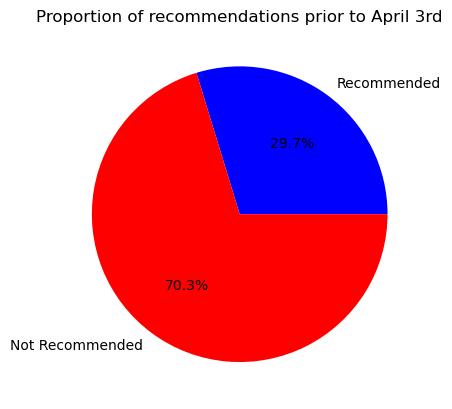

In [626]:
fig, ax = plt.subplots()
ax.pie(sizes1, labels=labels, autopct='%1.1f%%', colors=colors)
ax.set_title('Proportion of recommendations prior to April 3rd')
plt.show()

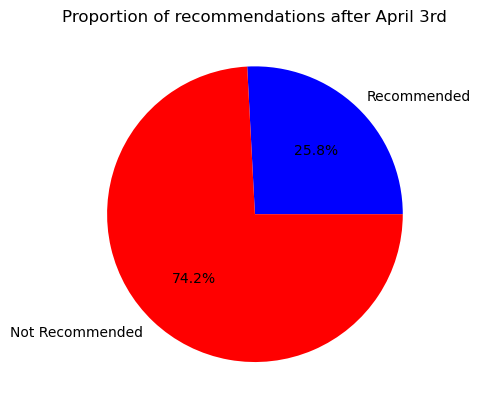

In [628]:
fig, ax = plt.subplots()
ax.pie(sizes2, labels=labels, autopct='%1.1f%%', colors=colors)
ax.set_title('Proportion of recommendations after April 3rd')
plt.show()

In [630]:
cats = ['Recommended', 'Not Recommended']

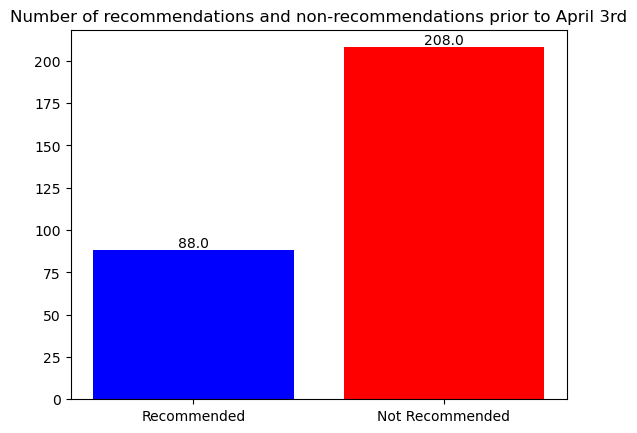

In [632]:
fig, ax = plt.subplots()
ax.bar(cats, sizes1)
bars = ax.bar(cats, sizes1, color = colors)

ax.set_title('Number of recommendations and non-recommendations prior to April 3rd')

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.1f}',
        ha='center', va='bottom'
    )

plt.show()

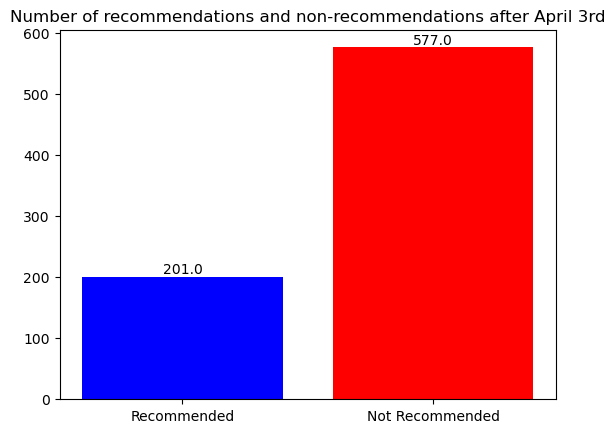

In [634]:
fig, ax = plt.subplots()
ax.bar(cats, sizes1)
bars = ax.bar(cats, sizes2, color = colors)

ax.set_title('Number of recommendations and non-recommendations after April 3rd')

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.1f}',
        ha='center', va='bottom'
    )

plt.show()

In [636]:
201/88

2.284090909090909

In [638]:
577/208

2.7740384615384617

In [640]:
df_pre['polarity_scores'].mean()

-0.05572567567567567

In [642]:
df_post['polarity_scores'].mean()

-0.08034408740359897

In [644]:
df_pre['polarity_scores'].median()

0.0

In [646]:
df_post['polarity_scores'].median()

0.0

In [648]:
pre_list = [score for score in df_pre['polarity_scores']]

In [650]:
post_list = [score for score in df_post['polarity_scores']]

In [652]:
def sign_counter(lst):
    pos = 0
    neg = 0
    zer = 0
    for num in lst:
        if num > 0:
            pos += 1
        if num < 0:
            neg += 1
        if num == 0:
            zer += 1
    return (pos, neg, zer)

In [654]:
sign_counter(pre_list)

(100, 123, 73)

In [656]:
sign_counter(post_list)

(247, 347, 184)

In [658]:
247/100

2.47

In [660]:
347/123

2.821138211382114

In [662]:
184/73

2.5205479452054793

In [664]:
labels2 = 'Positive', 'Negative', 'Zero'
sizes3 = [100, 123, 73]
sizes4 = [247, 347, 184]
colors2 = ['blue', 'red', 'gray']

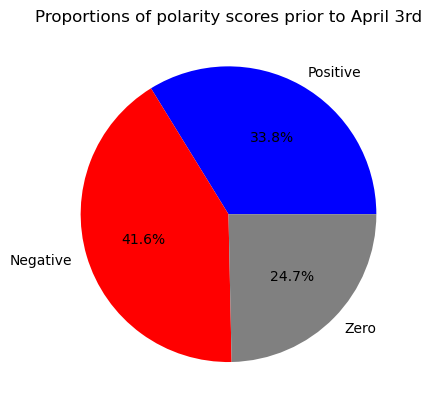

In [666]:
fig, ax = plt.subplots()
ax.pie(sizes3, labels=labels2, autopct='%1.1f%%', colors=colors2)
ax.set_title('Proportions of polarity scores prior to April 3rd')
plt.show()

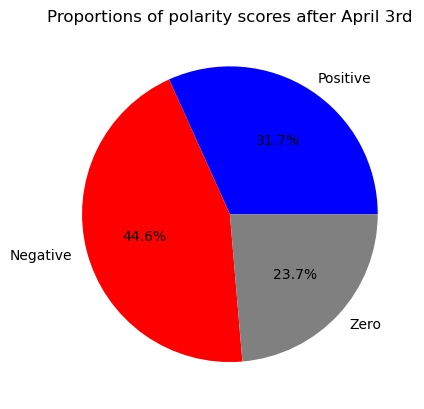

In [668]:
fig, ax = plt.subplots()
ax.pie(sizes4, labels=labels2, autopct='%1.1f%%', colors=colors2)
ax.set_title('Proportions of polarity scores after April 3rd')
plt.show()